#### 2. Find the interest over time for the topic from trends

In [1]:
import re
import numpy as np
import time
import pandas as pd                        
from pytrends.request import TrendReq
#proxies=['https://34.203.233.13:80',]
pytrends = TrendReq(hl='en-US', tz=530, timeout=(10,25), retries=2, backoff_factor=0.1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
  
# curve-fit() function imported from scipy 
from scipy.optimize import curve_fit 
%matplotlib inline

In [3]:
hashtags = {'#1YearOfITABestJodiAshDeep',
 '#BJPSweepsGujarat',
 '#Bigil',
 '#BiharElectionResults',
 '#BiharElections2020',
 '#BiharResult',
 '#BoycottAmazon',
 '#Congress',
 '#DubbakaBypolls',
 '#IPLUnacademyVideo',
 '#IPLfinal',
 '#IrandamKuththu',
 '#MIvsDC',
 '#MadhyaPradeshbyelection',
 '#MouseHunt',
 '#PhotoThaakku',
 '#PushpaRajHuntBegins',
 '#ReleaseArnabVoiceOfSSR',
 '#TescoMealDeal',
 '#WorldScienceDay',
 '#ganapath',
 '#pspk27',
 '#tuesdayvibe'}

topics = {'Armenia',
 'Bihar Assembly',
 'Burnol',
 'EVMs',
 'Exit',
 'Harbhajan Singh',
 'IK NO DI CHEEZ',
 'India Today',
 'Jaipur',
 'Jharkhand',
 'Mahagathbandhan',
 'Mozambique',
 'NDTV',
 'Nitish',
 'Only 20%',
 'Owaisi',
 'Rona',
 'Shikhar Dhawan',
 'SidNaaz Craze',
 'Sira',
 'Starc',
 'Sushil Modi',
 'Yogendra Yadav',
 'bighit',
 'good air movement'}

twitter_stuff = hashtags.union(topics)



In [4]:
df = pytrends.top_charts(2019, hl='en-US', tz=300, geo='IN')

In [5]:
all_topics = twitter_stuff.union(set(list(df['title'])))
all_topics = list(all_topics)

In [6]:
# Test function with coefficients as parameters 
def func(t, c0,c1,c2,c3): 
    return c0+c1*t-c2*np.sin(-c3*t)

def no_of_days(x):
    temp = [(x[i]-x[0]).days for i in range(len(x))]
    return temp

def get_slope(x,param):
    slope = func(x[-1]+10,param[0],param[1],param[2],param[3]) - func(x[-1]+1,param[0],param[1],param[2],param[3])
    return slope

def pedict_next(x,param,y,n):
    
    y_n = np.empty(n)
    y_p = [func(i,param[0],param[1],param[2],param[3]) for i in x]
    
    xpred = [x[-1]+i for i in range(1,11)]
    ypred = [func(i,param[0],param[1],param[2],param[3]) for i in xpred]

    
    plt.plot(x,y,'b',label = 'Current Trend')
    plt.plot(x,y_p,'r', label = 'Fitted Curve')
    plt.plot(xpred,ypred,'r--', label = 'Prediction for next 10 days')
    plt.legend()


In [7]:
def trend_status(topic, plot = False):
    kw_list = [topic]
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='IN', gprop='')
    interest = pytrends.interest_over_time().tail(5)
    interest = interest[interest.columns[0]]
    
    x = no_of_days(list(interest.index))
    y = list(interest)
    n = len(x)

    guess = [100,0.01,100,0.01]
    
    param, param_cov = curve_fit(func, x, y,guess,maxfev = 100000) 
    
    slope = get_slope(x,param)
    
    if plot:
        pedict_next(x,param,y,n)
    
    return slope

-30.678739853280504

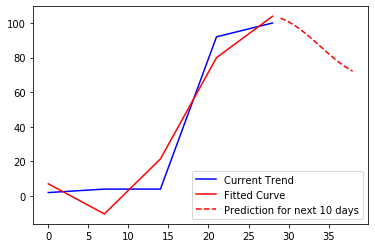

In [8]:
trend_status('Biden',plot = True)

21.644400785582548

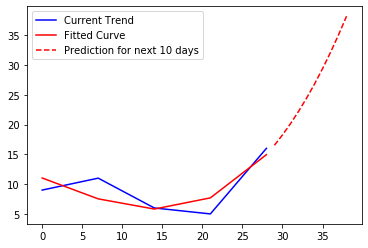

In [21]:
trend_status('Kamala Harris',plot = True)

5.0936015622716155

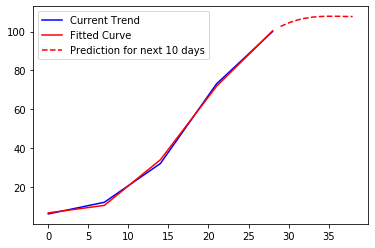

In [23]:
trend_status('Bihar Exit Poll',plot = True)

In [9]:
popularity = {}
for title in all_topics:
    temp = title
    if title.startswith('#'):
        title = title[1:]
        title = re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', title)
        if len(title)<1: 
            continue
        title = ' '.join(title)
    try:
        slope = trend_status(title)
        popularity[temp] = slope
    except Exception as e:
        #print(e)
        #print(title)
        pass
    
    

In [10]:
popularity

{'#IPLUnacademyVideo': 201.50846523672226,
 'Owaisi': 33.14309147777385,
 '#MouseHunt': 2.6638388176752414,
 'EVMs': -4.618651183906136,
 'Yogendra Yadav': -4.480211499342686,
 'Avengers: Endgame': 4.4017327560652575e-09,
 '#IrandamKuththu': 2.5243903060846065,
 'Harbhajan Singh': -6.056925871546275,
 'Jharkhand': 6.618748324938679,
 'Nitish': 66.61468657716614,
 'Sushil Modi': 35.73087189628859,
 'Captain Marvel': 0.39445066863179057,
 'Cricket World Cup': 4.4017327560652575e-09,
 'India Today': 13.532403986146164,
 'Kabir Singh': 2.427742007427014e-08,
 'NEET results': -87.09045943491572,
 '#DubbakaBypolls': 201.50846523672226,
 'Armenia': 9.586812909610671,
 'Chandrayaan 2': 0.23611733609077734,
 'Rona': -0.8134999640175913,
 '#WorldScienceDay': 0.5025134053103564,
 '#BiharElectionResults': 44.43664086096396,
 '#BiharResult': 1.0139027422669473,
 'Shikhar Dhawan': 32.36525066052491,
 'Mozambique': 45.513199993016315,
 'NDTV': 130.71181407224503,
 'Burnol': 10.945126638896909,
 'PM K

In [13]:
popularity_db = pd.DataFrame(popularity.items())
popularity_db.columns = ['title','popularity']

In [14]:
scaler = MinMaxScaler()
popularity_db['popularity'] = scaler.fit_transform(popularity_db['popularity'].values.reshape(-1,1))

In [15]:
popularity_db.sort_values(by = 'popularity', ascending=False, inplace=True)

popularity_db.reset_index(inplace=True)
popularity_db['popularity'] = popularity_db['popularity']*100

In [16]:
db_len = len(popularity_db)

In [17]:
popularity_db = popularity_db[['title','popularity']]

In [18]:
popularity_db.at[0, 'popularity'] = popularity_db.at[0, 'popularity'] - 1
popularity_db.at[db_len-1, 'popularity'] = popularity_db.at[db_len-1, 'popularity'] + 1

In [19]:
popularity_db

,title,popularity
0,#DubbakaBypolls,99.000000
1,#IrandamKuththu,77.141566
2,Bihar Assembly,63.786451
3,NEET results,48.965465
4,#BiharElectionResults,47.482541
5,bighit,46.416561
6,Shikhar Dhawan,43.898400
7,Jaipur,42.561668
8,Sira,40.754191
9,Starc,35.165562


In [20]:
popularity_db.to_pickle('step2_trendy_data.pkl')